In [10]:
import pandas
from statsmodels.formula.api import glm
from statsmodels.genmod.families.family import Binomial

In [11]:
burnout = pandas.read_csv('burnout.csv')

In [3]:
burnout.head()

,burnout,loc,cope,teaching,research,pastoral
0,Not Burnt Out,7.647059,9.160305,32.727273,87.500000,31.481481
1,Not Burnt Out,6.470588,12.977099,52.727273,66.666667,68.518519
2,Not Burnt Out,8.823529,9.160305,49.090909,60.416667,53.703704
3,Not Burnt Out,20.000000,9.160305,52.727273,62.500000,50.000000
4,Not Burnt Out,6.470588,19.083969,43.636364,79.166667,40.740741


In [12]:
burnout['y'] = burnout['burnout'].replace({'Burnt Out': 1, 'Not Burnt Out': 0})

In [13]:
res = glm('y ~ cope', burnout, family=Binomial()).fit()
# glm : 일반화 선형 모형 (generalize) 더 적용하기 쉽게 바꿈 - faimly를 만들어줌 
# y = ax+b에서 family를 줘서 변형을 해주는 거임 (bionomal - 로지스틱)
# binomial로 faimly를 지정해주면, 로지스틱 선형 모형으로 바꿔줌 (cope를 가지고 y를 예측)

In [14]:
res.summary()
# 계수가 제일 중요 : cope -> 신뢰구간이 둘 다 ++ , cope의 값이 올라갈 수록 burn out 될 확률도 올라간다 
# aic, bic 확인 ( 이 표에서 안 보여주니까 밑에서 수동으로 확인) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  467
Model:                            GLM   Df Residuals:                      465
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -199.52
Date:                Tue, 01 Oct 2019   Deviance:                       399.03
Time:                        10:34:32   Pearson chi2:                     575.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3839      0.283    -11.943      0.000      -3.939      -2.829
cope           0.0862      0.009      9.519      0.000       0.068       0.104
==============================================================================
"""

In [145]:
res.aic

403.0328572766329

In [146]:
res.bic
# 왜 - 지..? 계산이 좀 이상,,, 선생님이 다시 확인

-2459.010247539404

In [ ]:
# cope말고 teaching 변수 넣어보기 

In [15]:
res = glm('y ~ teaching', burnout, family=Binomial()).fit()

In [16]:
res.summary()
# teaching도 cope 처럼 하면 burn out 확률이 높아져감 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  467
Model:                            GLM   Df Residuals:                      465
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -247.30
Date:                Tue, 01 Oct 2019   Deviance:                       494.60
Time:                        10:36:12   Pearson chi2:                     457.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9560      0.532     -7.439      0.000      -4.998      -2.914
teaching       0.0504      0.009      5.679      0.000       0.033       0.068
==============================================================================
"""

In [17]:
# 둘 다 넣어보기 
res = glm('y ~ teaching + cope', burnout, family=Binomial()).fit()

In [18]:
res.summary()
# cope가 같은 수준일 때 보면, teaching을 많이 한 사람이 오히려 burn out이 덜 됨 
# 한 변수를 통제했을 때 다른 변수가 바뀌는 case

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  467
Model:                            GLM   Df Residuals:                      464
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.55
Date:                Tue, 01 Oct 2019   Deviance:                       393.09
Time:                        10:37:58   Pearson chi2:                     563.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0771      0.592     -3.508      0.000      -3.238      -0.917
teaching      -0.0323      0.013     -2.400      0.016      -0.059      -0.006
cope           0.1050      0.012      8.443      0.000       0.081       0.129
==============================================================================
"""

In [19]:
# : (*)로 넣어볼 때 
res = glm('y ~ teaching * cope', burnout, family=Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  467
Model:                            GLM   Df Residuals:                      463
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.25
Date:                Tue, 01 Oct 2019   Deviance:                       354.51
Time:                        10:39:46   Pearson chi2:                     357.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.4114      1.359     -6.187      0.000     -11.076      -5.747
teaching          0.0684      0.023      2.987      0.003       0.024       0.113
cope              0.3287      0.042      7.736      0.000       0.245       0.412
teaching:cope    -0.0033      0.001     -5.802      0.000      -0.004      -0.002
=================================================================================
"""

In [ ]:
# r 제곱이 없는 이유 ? - y는 확률이기 때문에 (연속 변수가 아니어서) r제곱 분산은 없음. 
# Deviance : Log-Likelihood * (-2) : 직접 쓸 일은 없고 지표 같은 내용을 계산할 때 씀 
# 그냥 aic, bic 확인하면 됨. (0에 가까운 쪽이 좋다)

## 예측

In [23]:
prob = res.predict(burnout)
# predict 함수 (독립변수에 해당되는 데이터를 넣어주면 됨 - 알아서 y의 확률을 알려줌 ) - 로지스틱 말고 선형 모형도 가능함
# 원칙적으로는 새 데이터(b아예 다른 테이블에서 조사해보지 않은 독립변수들을 넣어줘야 함)
# 로지스틱 회귀분석(glm) -> res(계수) -> res.predict : 새 데이터(y가 없으니까 예측) / 원래 데이터(실제 y하고 예측을 비교해서 채점)
prob 
# 0.015 -> 1.5% (brun out 될 확률)

0      0.015454
1      0.057103
2      0.028438
3      0.032525
4      0.128978
         ...   
462    0.694301
463    0.933334
464    0.506838
465    0.772203
466    0.342818
Length: 467, dtype: float64

In [25]:
import numpy

In [26]:
pred = numpy.where(prob > .5, 1, 0) #기준점 50%, 높으면 1, 낮으면 0 
# where 함수 (어디서 자를거냐)

In [28]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 혼돈행렬

In [29]:
from sklearn.metrics import confusion_matrix
# 혼돈행렬 : 말 그래도 혼돈..! 4가지 경우 
# burn out 안 된 경우 -> 된 경우 (혹은 그 반대)
# 물론 aic, bic가 그 모델이 맞았는 지 판단해주지만, 혼돈행렬까지 보면 더 확실히 알 수 있음 

In [32]:
true = burnout['y']
confusion_matrix(true, pred)
# 세로가 예측, 가로가 실제 (표)

array([[311,  37],
       [ 58,  61]])

```
                        예측
                      Not Burnt Out     Burnt Out
실제  Not Burnt Out    311(ture-nagative)   27(false positive) 
       Burnt Out      72(false-nagative)   47(true positive)
        
정확도 = tn+tp/전체합(tn+fn+fp+tp) = 378/467 

다른 확률들도 구할 수 있음 -> 내가 positive 예측한 게 얼마나 맞았냐(정밀도) tp/tp+fp : 예측(1)
                     -> 실제 내가 문제가 있다고 예측한 게 얼마나 맞았냐(재현도) tp/fn+tp : 실제(1)
```   

## 정확도, 정밀도, 재현도

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [41]:
accuracy_score(true, pred)

0.7965738758029979

In [42]:
precision_score(true, pred, pos_label=1)

0.6224489795918368

In [43]:
recall_score(true, pred, pos_label=1)

0.5126050420168067

## ROC 곡선

In [44]:
from sklearn.metrics import roc_curve, auc

In [45]:
fpr, tpr, threshold = roc_curve(true, prob, pos_label=1) #prob : 확률(기준) 
# 정밀도, 재현도, 기준값 

In [50]:
pandas.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':threshold})
# 1.99 값? -> 별 의미는 없음. 확률은 0-1사이임. 확률 100%를 넘길 순 없으니 그냥 1이랑 같은 값.

,fpr,tpr,threshold
0,0.000000,0.000000,1.990357
1,0.000000,0.008403,0.990357
2,0.000000,0.033613,0.959496
3,0.002874,0.033613,0.949422
4,0.002874,0.075630,0.920528
5,0.005747,0.075630,0.916035
6,0.005747,0.092437,0.907775
7,0.005747,0.100840,0.894815
8,0.005747,0.117647,0.867725
9,0.005747,0.126050,0.865184


In [46]:
import seaborn

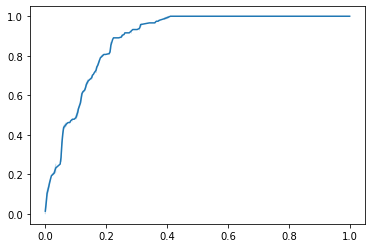

In [47]:
seaborn.lineplot(fpr, tpr)

In [158]:
auc(fpr, tpr)
# auc (arial under curve) : 곡선 아래 모양이 어떻게 되냐 (역 ㄱ자면일수록 좋음)

0.8789843523616343

## 클러스터링

In [55]:
wine = pandas.read_csv('wine.csv')

In [56]:
wine.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
data = wine.iloc[:, 1:] # iloc(번호로 위치지정) [:, 1:] 첫번째는 모든 행, 두번째는 1열부터 1: 

In [58]:
data.head()


,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 변수들 수치가 다 다르기 때문에 일정한 범위로 맞춰줘야함 (크기를 동일하게 scaling)
- 1) Min-Max Scaling : 최소값은 0, 최대값은 1이 되도록 조정 (굉장히 큰 극단치가 존재할 때, 고르게 분포하지 않고 중간이 비어버림)
- 2) 표준화(Standardization): 모든 값에서 평균을 빼고, 표준편차로 나눠주는 것 (더 자주 쓰는 방법)


## 표준화

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scale = StandardScaler()

In [64]:
scale.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
x = scale.transform(data)

In [99]:
pandas.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#  KMeans

In [66]:
from sklearn.cluster import KMeans

In [67]:
km = KMeans(n_clusters=3)
# 데이터를 3개로 묶어서 각각 평균점을 찾음 

In [100]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [105]:
wine['Class'].values
# 3 집단 존재 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [101]:
km.predict(x)
# 번호는 알아서 붙여줌. (원래 class에 존재하는 종류랑 대충 비슷하게 나옴)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

# AffinityPropagation

In [70]:
from sklearn.cluster import AffinityPropagation

In [71]:
ap = AffinityPropagation(preference=-200)
# preference : ap는 서로 비슷하면 대표를 선출하는 데, 그럼 얼마나 서로 비슷하냐! 를 조정해주는 게 바로 preference다. 

In [72]:
ap.fit(x)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-200, verbose=False)

In [73]:
ap.predict(x)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# MeanShift

In [74]:
from sklearn.cluster import MeanShift

In [75]:
ms = MeanShift(bandwidth=3)
# 어떤 점에서 거리가 3이내면 찾아서 평균을 낸다. 마지막에 평균에서 멈추는 점이 같은 애들끼리 군집 

In [76]:
ms.fit(x)

MeanShift(bandwidth=3, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [77]:
ms.predict(x)
# 결과가 이상하게 나옴 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 5, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 8, 4, 4, 4, 0, 0, 0, 0, 4, 7, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# SpectralClustering

In [78]:
from sklearn.cluster import SpectralClustering

In [79]:
sc = SpectralClustering(n_clusters=3)

In [80]:
sc.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

# AgglomerativeClustering

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
ac = AgglomerativeClustering(n_clusters=3)

In [83]:
ac.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# DBSCAN

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
ds = DBSCAN(eps=3, min_samples=5) # 거리, 개수 -> 주변 거리 3이내에 비슷한 값이 5개가 있어야함  

In [86]:
ds.fit_predict(x)
# -1 : 주변에 비슷한 군집 이 없는 데이터값

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [87]:
import sklearn

In [88]:
sklearn.__version__

'0.21.3'

In [89]:
labels_km = km.predict(x)

In [90]:
labels_ap = ap.predict(x)

In [91]:
from sklearn.metrics import davies_bouldin_score

In [92]:
davies_bouldin_score(x, labels_km)

1.3891879777181648

In [93]:
davies_bouldin_score(x, labels_ap)

1.4523177938566059

In [94]:
from sklearn.metrics import silhouette_score

In [95]:
silhouette_score(x, labels_km)

0.2848589191898987

In [96]:
silhouette_score(x, labels_ap)

0.2511804643887535